<a href="https://colab.research.google.com/github/StephenSpicer/Unit_02_Clone/blob/master/Stephen_Lupsha_LS_DS_211_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 1, Module 1*

---

# Regression 1

## Assignment

You'll use another **New York City** real estate dataset. 

But now you'll **predict how much it costs to rent an apartment**, instead of how much it costs to buy a condo.

The data comes from renthop.com, an apartment listing website.

- [ ] Look at the data. Choose a feature, and plot its relationship with the target.
- [ ] Use scikit-learn for linear regression with one feature. You can follow the [5-step process from Jake VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html#Basics-of-the-API).
- [ ] Define a function to make new predictions and explain the model coefficient.
- [ ] Organize and comment your code.

> [Do Not Copy-Paste.](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) You must type each of these exercises in, manually. If you copy and paste, you might as well not even do them. The point of these exercises is to train your hands, your brain, and your mind in how to read, write, and see code. If you copy-paste, you are cheating yourself out of the effectiveness of the lessons.

If your **Plotly** visualizations aren't working:
- You must have JavaScript enabled in your browser
- You probably want to use Chrome or Firefox
- You may need to turn off ad blockers
- [If you're using Jupyter Lab locally, you need to install some "extensions"](https://plot.ly/python/getting-started/#jupyterlab-support-python-35)

## Stretch Goals
- [ ] Do linear regression with two or more features.
- [ ] Read [The Discovery of Statistical Regression](https://priceonomics.com/the-discovery-of-statistical-regression/)
- [ ] Read [_An Introduction to Statistical Learning_](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf), Chapter 2.1: What Is Statistical Learning?

# ***Do Not Copy-Paste. You must type each of these exercises in, manually. If you copy and paste, you might as well not even do them. The point of these exercises is to train your hands, your brain, and your mind in how to read, write, and see code. If you copy-paste, you are cheating yourself out of the effectiveness of the lessons.***

In [ ]:
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'

# If you're working locally:
else:
    DATA_PATH = '../data/'
    
# Ignore this Numpy warning when using Plotly Express:
# FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

In [ ]:
# Read New York City apartment rental listing data
import pandas as pd
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
import numpy as np
import seaborn as sns


df = pd.read_csv(DATA_PATH+'apartments/renthop-nyc.csv',
                parse_dates=['created'],
                index_col='created')

#assert df.shape == (49352, 34)
#changing this to 33 since i am indexing on "created"
assert df.shape == (49352, 33)

In [ ]:
df.shape

(49352, 33)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 49352 entries, 2016-06-24 07:54:24 to 2016-04-12 02:48:07
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   bathrooms             49352 non-null  float64
 1   bedrooms              49352 non-null  int64  
 2   description           47906 non-null  object 
 3   display_address       49217 non-null  object 
 4   latitude              49352 non-null  float64
 5   longitude             49352 non-null  float64
 6   price                 49352 non-null  int64  
 7   street_address        49342 non-null  object 
 8   interest_level        49352 non-null  object 
 9   elevator              49352 non-null  int64  
 10  cats_allowed          49352 non-null  int64  
 11  hardwood_floors       49352 non-null  int64  
 12  dogs_allowed          49352 non-null  int64  
 13  doorman               49352 non-null  int64  
 14  dishwasher            49352 non-nul

In [ ]:
# Remove outliers: 
# the most extreme 1% prices,
# the most extreme .1% latitudes, &
# the most extreme .1% longitudes
df = df[(df['price'] >= 1375) & (df['price'] <= 15500) & 
        (df['latitude'] >=40.57) & (df['latitude'] < 40.99) &
        (df['longitude'] >= -74.1) & (df['longitude'] <= -73.38)]

In [ ]:
df.shape

(48818, 33)

In [ ]:
# Alright, this is our trimmed dataframe. 
df.head()


,bathrooms,bedrooms,description,display_address,latitude,longitude,price,street_address,interest_level,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
created,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-06-24 07:54:24,1.5,3,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,40.7145,-73.9425,3000,792 Metropolitan Avenue,medium,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2016-06-12 12:19:27,1.0,2,,Columbus Avenue,40.7947,-73.9667,5465,808 Columbus Avenue,low,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2016-04-17 03:26:41,1.0,1,"Top Top West Village location, beautiful Pre-w...",W 13 Street,40.7388,-74.0018,2850,241 W 13 Street,high,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2016-04-18 02:22:02,1.0,1,Building Amenities - Garage - Garden - fitness...,East 49th Street,40.7539,-73.9677,3275,333 East 49th Street,low,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2016-04-28 01:32:41,1.0,4,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,40.8241,-73.9493,3350,500 West 143rd Street,low,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Text(0, 0.5, 'Price')

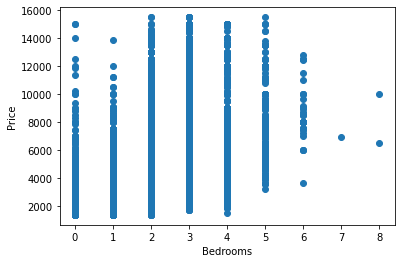

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df['bedrooms'], df['price'])
plt.xlabel('Bedrooms')
plt.ylabel('Price')

# Well, that looks like a mess.

Text(0, 0.5, 'Price')

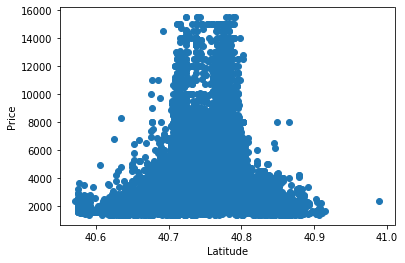

In [ ]:
plt.scatter(df['latitude'], df['price'])
plt.xlabel('Latitude')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

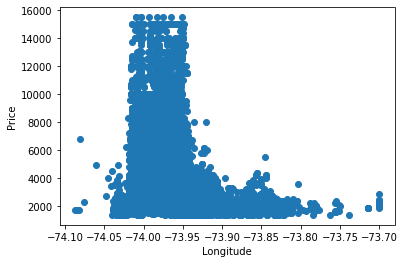

In [ ]:

plt.scatter(df['longitude'], df['price'])
plt.xlabel('Longitude')
plt.ylabel('Price')

In [ ]:
# Splitting the data into feature matrix (latitude first) and one target vector (price) 
X_lat = df[['latitude']]
y_lat = df['price']
assert len(X_lat) == len(y)

In [ ]:
y_mean = y.mean()
print("mean rental price:", y_mean)

y_pred = [y_mean]*len(y)
#Don't forget to put y_mean in brackets - also, remember to ask Nicholas what that does exactly? does it convert it to a float? 
print('Baseline Mean Absolute Error:', mean_absolute_error(y, y_pred))

mean rental price: 3579.5609816051456
Baseline Mean Absolute Error: 1201.5251847945751


Text(0, 0.5, 'Price')

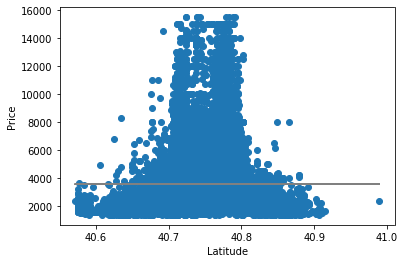

In [ ]:
plt.scatter(df['latitude'], df['price'])
plt.plot(df['latitude'], y_lat_pred, label='baseline model line', color='grey')
plt.xlabel('Latitude')
plt.ylabel('Price')

Clearly this is useless without Longitude, so I'm gonna repeat my process for that just so we have those variables. 

I mean, theoretically neither is USELESS without the other, by why would one look at rent prices across only a certain latitude or longitude within NYC? I can't imagine what shared characteristics those would have except for stops along public transpo etc. Also, no apparent linear relationship at all, although clearly a high value area in there between 40.7 and 40.8. 

# Since latitude is north south I would bet money that that range is probably central park... 


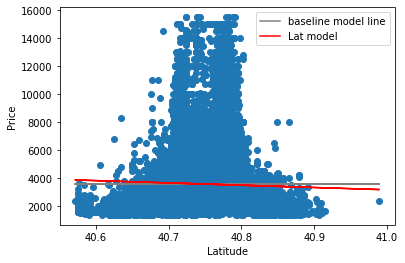

In [ ]:
# Step 1: Import predictor class
from sklearn.linear_model import LinearRegression

# Step 2: Instantiate my predictor
model_lat = LinearRegression()

# Step 3: FIT my predictor on the (training) data
model_lat.fit(X_lat, y)

plt.scatter(df['latitude'], df['price'])
plt.plot(df['latitude'], y_pred, label = 'baseline model line', color='grey')
plt.plot(df['latitude'], model_lat.predict(X), label='Lat model', color='red')
plt.xlabel('Latitude')
plt.ylabel('Price')
plt.legend()



Re-doing all this for longitude :


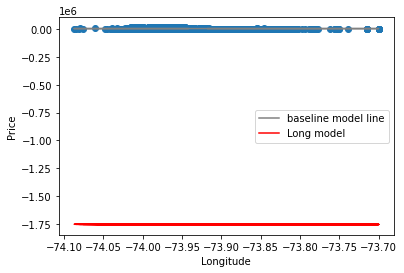

In [ ]:
# Splitting the data into feature matrix (latitude first) and one target vector (price) 
X_long = df[['longitude']]

assert len(X_long) == len(y)



# Step 2: Instantiate my predictor
model_long = LinearRegression()

# Step 3: FIT my predictor on the (training) data
model_long.fit(X_long, y)

plt.scatter(df['longitude'], df['price'])
plt.plot(df['longitude'], y_pred, label = 'baseline model line', color='grey')
plt.plot(df['longitude'], model_long.predict(X), label='Long model', color='red')
plt.xlabel('Longitude')
plt.ylabel('Price')
plt.legend()


In [ ]:
print(f'Price = {model_lat.intercept_} + {model_lat.coef_[0]} * Latitude')
print(f'Price = {model_long.intercept_} + {model_long.coef_[0]} * Longitude')
print(f'Price = {model_both.intercept_} + {model_both.coef_[0]} * Lat & Long')

Price = 70335.08264693896 + -1638.1419024698357 * Latitude
Price = -1129321.795081219 + -15315.115869638641 * Longitude
Price = -1302010.404899411 + 2347.9931260842086 * Lat & Long


We can see from our results above that the fact that the Longitude in manhattan is negative, it's really throwing the calculation off. I need to figure out how to do a multi-variable regression model here and possibly even change the longitude to positive somehow... I don't know, reading more now. 

In [ ]:
X_Both = df[['latitude', 'longitude']]
model_both = LinearRegression()
model_both.fit(X_Both, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# To quote the internet, and why I can't use Lat/Long

## *You cannot use them directly, as it is unlikely there is a true linear relationship unless you're looking to predict "how far east or north" someone is. As mentioned in the comments, you need to convert them into zones. If you wanted to keep it really simple, you could use a kNN clustering algorithm with a low number of potential clusters and then assign each instance a new feature with the cluster ID, and then one-hot encode that.*

# Obviously, I'm not doing all that today. I'm gonna move on to another observation or X. Most of the variables here are CATEGORICAL and not QUANTITATIVE - which will make it tough 

In [ ]:
df.head()

,bathrooms,bedrooms,description,display_address,latitude,longitude,price,street_address,interest_level,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
created,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-06-24 07:54:24,1.5,3,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,40.7145,-73.9425,3000,792 Metropolitan Avenue,medium,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2016-06-12 12:19:27,1.0,2,,Columbus Avenue,40.7947,-73.9667,5465,808 Columbus Avenue,low,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2016-04-17 03:26:41,1.0,1,"Top Top West Village location, beautiful Pre-w...",W 13 Street,40.7388,-74.0018,2850,241 W 13 Street,high,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2016-04-18 02:22:02,1.0,1,Building Amenities - Garage - Garden - fitness...,East 49th Street,40.7539,-73.9677,3275,333 East 49th Street,low,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2016-04-28 01:32:41,1.0,4,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,40.8241,-73.9493,3350,500 West 143rd Street,low,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Text(0, 0.5, 'Price')

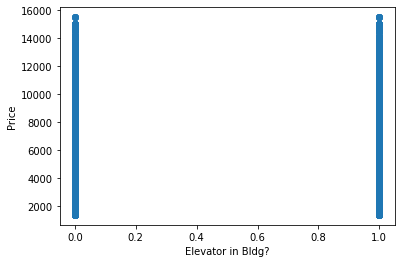

In [ ]:
# Back to the beginning 

plt.scatter(df['elevator'], df['price'])
plt.xlabel('Elevator in Bldg?')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

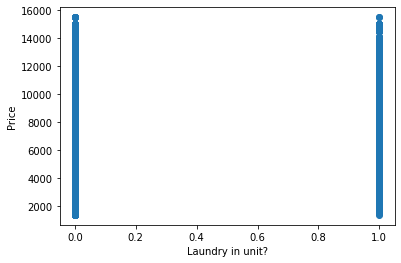

In [ ]:

plt.scatter(df['laundry_in_unit'], df['price'])
plt.xlabel('Laundry in unit?')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

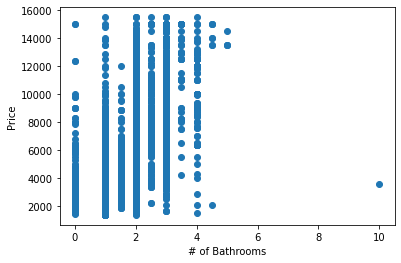

In [ ]:
plt.scatter(df['bathrooms'], df['price'])
plt.xlabel('# of Bathrooms')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

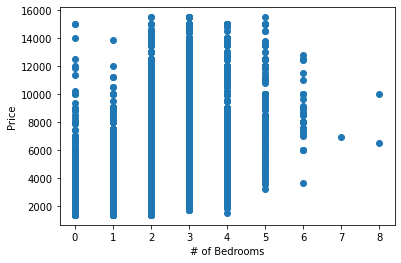

In [ ]:
plt.scatter(df['bedrooms'], df['price'])
plt.xlabel('# of Bedrooms')
plt.ylabel('Price')

## Impossible. God this is going nowhere. 

In [ ]:
df.head()

,bathrooms,bedrooms,description,display_address,latitude,longitude,price,street_address,interest_level,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
created,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-06-24 07:54:24,1.5,3,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,40.7145,-73.9425,3000,792 Metropolitan Avenue,medium,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2016-06-12 12:19:27,1.0,2,,Columbus Avenue,40.7947,-73.9667,5465,808 Columbus Avenue,low,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2016-04-17 03:26:41,1.0,1,"Top Top West Village location, beautiful Pre-w...",W 13 Street,40.7388,-74.0018,2850,241 W 13 Street,high,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2016-04-18 02:22:02,1.0,1,Building Amenities - Garage - Garden - fitness...,East 49th Street,40.7539,-73.9677,3275,333 East 49th Street,low,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2016-04-28 01:32:41,1.0,4,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,40.8241,-73.9493,3350,500 West 143rd Street,low,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# df["sum"] = df.sum(axis=1)
# nope. OK. I'm going to add the "amenities" - one would assume that each of those factors increases the value of a rental right?

df_amenities = df.copy()
#copy
df_amenities.drop(['description','bathrooms', 'bedrooms', 'display_address', 'latitude', 'longitude', 'price', 'street_address', 'interest_level'], axis=1, inplace=True)
#drop the non-boolean variables. 

df_amenities["amenities_score"] = df_amenities.sum(axis=1)
# sum it up into a new column. 

In [ ]:
df_amenities.head()

,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space,amenities_score
created,,,,,,,,,,,,,,,,,,,,,,,,,
2016-06-24 07:54:24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2016-06-12 12:19:27,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
2016-04-17 03:26:41,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
2016-04-18 02:22:02,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
2016-04-28 01:32:41,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
# and finally add that column back onto the original dataframe. 
df["amenities_score"] = df_amenities['amenities_score']
df.head()

,bathrooms,bedrooms,description,display_address,latitude,longitude,price,street_address,interest_level,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space,amenities_score
created,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-06-24 07:54:24,1.5,3,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,40.7145,-73.9425,3000,792 Metropolitan Avenue,medium,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2016-06-12 12:19:27,1.0,2,,Columbus Avenue,40.7947,-73.9667,5465,808 Columbus Avenue,low,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
2016-04-17 03:26:41,1.0,1,"Top Top West Village location, beautiful Pre-w...",W 13 Street,40.7388,-74.0018,2850,241 W 13 Street,high,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
2016-04-18 02:22:02,1.0,1,Building Amenities - Garage - Garden - fitness...,East 49th Street,40.7539,-73.9677,3275,333 East 49th Street,low,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
2016-04-28 01:32:41,1.0,4,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,40.8241,-73.9493,3350,500 West 143rd Street,low,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


Text(0, 0.5, 'Price')

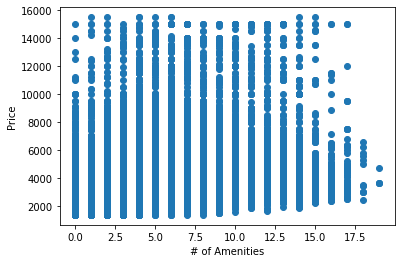

In [ ]:
plt.scatter(df['amenities_score'], df['price'])
plt.xlabel('# of Amenities')
plt.ylabel('Price')

We can pretty clearly see that there are plenty of places with "few" amenities that are priced awfully high...at least compared to what I would pay for rent. 

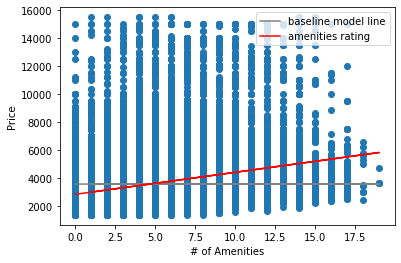

In [ ]:


# predictor class is already imported. 

# Step 2: Instantiate my predictor
model_amenities = LinearRegression()

# Step 3: FIT my predictor on the (training) data
# 3. Arrange X features matrix & y target vector
# gotta remember to ask about the different language here in the steps. the 5 steps of modeling here... 



features = ['amenities_score']
target = ['price']

x_train = df[features]
y_train = df[target]

model_amenities.fit(x_train, y_train)

plt.scatter(df['amenities_score'], df['price'])
plt.plot(df['amenities_score'], y_pred, label = 'baseline model line', color='grey')
plt.plot(df['amenities_score'], model_amenities.predict(x_train), label='amenities rating', color='red')
plt.xlabel('# of Amenities')
plt.ylabel('Price')
plt.legend()


at least amenities seems to go up at this point, as we expected. we expected some degree of positive slope. 

In [ ]:
print(f'Price = {model_amenities.intercept_} + {model_amenities.coef_[0]} * Amenities "Score"')


Price = [2843.40065221] + [157.55177491] * Amenities "Score"


I'm having some doubts about how I "did" here - perfect questions for support hours I guess. I feel like this unit is foundational for what employers will want us to be doing on a daily basis. 

In [ ]:
# ok, lets try something else. 

amenities_test = 13
x_test = [[amenities_test]]

y_pred_am = model_amenities.predict(x_test)
y_pred_am

array([[4891.57372603]])

Ok, based off of what we saw above that's not actually a terrible prediction. I mean, I've never paid rent in NYC, just saying... 



In [ ]:
amenities_test = 3
x_test = [[amenities_test]]

y_pred_am = model_amenities.predict(x_test)
y_pred_am

array([[3316.05597694]])

## The model seems off a bit, 13 was upper quartile for amenities, 3 was lower quartile. The high price seems accurate, the low price seems high. Not sure how to articulate this other than a gut feeling. I guess that's the whole point though... 

# Plenty of questions to ask tomorrow. 